In [9]:
# Concatenate, (Join, Merge)
import numpy as np
import pandas as pd

In [10]:
val1 = [[80, 69, 83, 98],[71, 90, 69, 66], [74, 72, 72, 95]]
val2 = [[68, 70, 84, 70],[65, 91, 90, 66], [78, 94, 96, 64]]
val3 = [[79, 99, 95, 90],[99, 76, 81, 97], [95, 80, 62, 84]]

idx1 = ['송중기', '박보검', '김나연']
idx2 = ['권보아', '김범수', '박효신']
idx3 = ['김유정', '홍은희', '이세영']

col1 = ['국어', '수학', '영어', '과학']
col2 = ['국어', '수학', '영어', '사회']

df1 = pd.DataFrame(val1, index=idx1, columns=col1)
df2 = pd.DataFrame(val2, index=idx2, columns=col1)
df3 = pd.DataFrame([[65, 82], [85, 60], [75, 78]], index=idx1, columns=['사회', '일어'])
    
df4 = df2.reindex(columns=['영어', '과학', '수학', '국어'])
df5 = pd.DataFrame(val3, index=idx3, columns=col2)

In [11]:
pd.concat([df1, df2])
# only one positional argument

,국어,수학,영어,과학
송중기,80,69,83,98
박보검,71,90,69,66
김나연,74,72,72,95
권보아,68,70,84,70
김범수,65,91,90,66
박효신,78,94,96,64


In [12]:
pd.concat([df1, df3], axis=1)

,국어,수학,영어,과학,사회,일어
송중기,80,69,83,98,65,82
박보검,71,90,69,66,85,60
김나연,74,72,72,95,75,78


In [13]:
print(df1, '\n', df4)
pd.concat([df1, df4])

     국어  수학  영어  과학
송중기  80  69  83  98
박보검  71  90  69  66
김나연  74  72  72  95 
      영어  과학  수학  국어
권보아  84  70  70  68
김범수  90  66  91  65
박효신  96  64  94  78


,국어,수학,영어,과학
송중기,80,69,83,98
박보검,71,90,69,66
김나연,74,72,72,95
권보아,68,70,84,70
김범수,65,91,90,66
박효신,78,94,96,64


In [14]:
print(df1, '\n', df5)
print(pd.concat([df1, df5], join='inner'))
print(pd.concat([df1, df5], join='outer'))

     국어  수학  영어  과학
송중기  80  69  83  98
박보검  71  90  69  66
김나연  74  72  72  95 
      국어  수학  영어  사회
김유정  79  99  95  90
홍은희  99  76  81  97
이세영  95  80  62  84
     국어  수학  영어
송중기  80  69  83
박보검  71  90  69
김나연  74  72  72
김유정  79  99  95
홍은희  99  76  81
이세영  95  80  62
     국어  수학  영어    과학    사회
송중기  80  69  83  98.0   NaN
박보검  71  90  69  66.0   NaN
김나연  74  72  72  95.0   NaN
김유정  79  99  95   NaN  90.0
홍은희  99  76  81   NaN  97.0
이세영  95  80  62   NaN  84.0


In [15]:
pd.concat([df1, df5.reindex(columns=df1.columns)])

,국어,수학,영어,과학
송중기,80,69,83,98.0
박보검,71,90,69,66.0
김나연,74,72,72,95.0
김유정,79,99,95,NaN
홍은희,99,76,81,NaN
이세영,95,80,62,NaN


In [16]:
# pd.concat(
#     objs,
#     axis=0,
#     join="outer",
#     ignore_index=False,
#     keys=None,
#     levels=None,
#     names=None,
#     verify_integrity=False,
#     copy=True,
# )

In [17]:

df1 = pd.DataFrame(
     {
         "A": ["A0", "A1", "A2", "A3"],
         "B": ["B0", "B1", "B2", "B3"],
         "C": ["C0", "C1", "C2", "C3"],
         "D": ["D0", "D1", "D2", "D3"],
     },
     index=[0, 1, 2, 3],
 )

df2 = pd.DataFrame(
     {
         "A": ["A4", "A5", "A6", "A7"],
         "B": ["B4", "B5", "B6", "B7"],
         "C": ["C4", "C5", "C6", "C7"],
         "D": ["D4", "D5", "D6", "D7"],
     },
     index=[4, 5, 6, 7],
 )

df3 = pd.DataFrame(
     {
         "A": ["A8", "A9", "A10", "A11"],
         "B": ["B8", "B9", "B10", "B11"],
         "C": ["C8", "C9", "C10", "C11"],
         "D": ["D8", "D9", "D10", "D11"],
     },
     index=[8, 9, 10, 11],
 )

frames = [df1, df2, df3]
result = pd.concat(frames)

In [18]:
result = pd.concat(frames, keys=['x', 'y', 'z'])
# 由來를 표시하기 위한 keys
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [19]:
result.loc[('y', 4), 'A']
# key option을 사용함으로써 결과적으로 hierarchical index(MultIndex)가 되었고 이를 location하기 위해 tuple( , )이 사용한다.

'A4'

In [20]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]
tuples = list(zip(*arrays))
# zip(*arrays)   🔰
    
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
# MultIndex.from_tuples   🔰

s = pd.Series(np.random.randn(8), index=index)
s

first  second
bar    one       1.296079
       two       0.439606
baz    one       1.232181
       two       0.657922
foo    one      -0.297473
       two      -0.130251
qux    one      -0.542055
       two       1.332764
dtype: float64

In [21]:
s.loc['qux']
# key값으로 data추출   🔰

second
one   -0.542055
two    1.332764
dtype: float64

In [22]:
s.loc[('qux', 'two')]
# Series에서 key와

1.3327640026111625

In [ ]:
# s.loc[("", "one")]
# # 안되네!!

In [ ]:
iterables = [["bar", "baz", "foo", "qux"], ["one", "two"]]
pd.MultiIndex.from_product(iterables, names=["first", "second"])
# MultiIndex.from_product   🔰

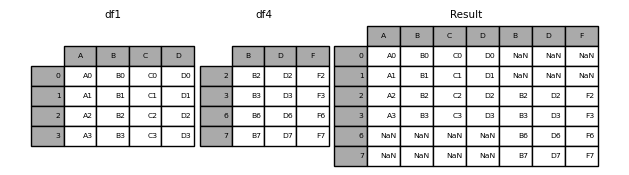

In [26]:
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)


result = pd.concat([df1, df4], axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [27]:
result = pd.concat([df1, df4], ignore_index=True, sort=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [ ]:
s1 = pd.Series(['X0', 'X1', 'X2', 'X3'], name='X')
result = pd.concat([df1, s1], axis=1)
result

In [ ]:
s3 = pd.Series([0, 1, 2, 3], name="foo")
s4 = pd.Series([0, 1, 2, 3])
s5 = pd.Series([0, 1, 4, 5])

pd.concat([s3, s4, s5], axis=1)

In [ ]:
# More concatenating with group keys
pd.concat([s3, s4, s5], axis=1, keys=["red", "blue", "yellow"])

In [ ]:
result = pd.concat(frames, keys=["x", "y", "z"])
# frames는 list
result

In [ ]:
pieces = {"x": df1, "y": df2, "z": df3}
# pieces는 dictionary
result = pd.concat(pieces)
result

In [ ]:
result = pd.concat(pieces, keys = ['z', 'y'])
result

In [ ]:
result.index.levels

In [ ]:
result = pd.concat(
    pieces, keys=["x", "y", "z"], levels=[["z", "y", "x", "w"]], names=["group_key"]
    # pieces, keys=["x", "y", "z"], names=["group_key"]
)
result

In [ ]:
result.index.levels

In [ ]:
# Appending rows to a DataFrame
s2 = pd.Series(["X0", "X1", "X2", "X3"], index=["A", "B", "C", "D"])
# s2.to_frame().T
result = pd.concat([df1, s2.to_frame().T], ignore_index=True)
result

In [ ]:
# Database-style DataFrame or named Series joining/merging
